# Kraljic Matrix analisys

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

### Importing well known libraries
#### Now I probably download datasets and I will look at it

In [5]:
path = kagglehub.dataset_download("shahriarkabir/procurement-strategy-dataset-for-kraljic-matrix")
path = path + r'/realistic_kraljic_dataset.csv' 
matrix_df = pd.read_csv(path)
matrix_df.head()

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic


In [6]:
matrix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [7]:
matrix_df.isnull().values.any()

False

### So data looks good, no NaN value or any strange dtype in columns

### Ok I think that good idea is showing Kraljic Matrix

In [9]:
matrix_df['Kraljic_Category'].value_counts()

Kraljic_Category
Strategic       250
Bottleneck      250
Leverage        250
Non-Critical    250
Name: count, dtype: int64

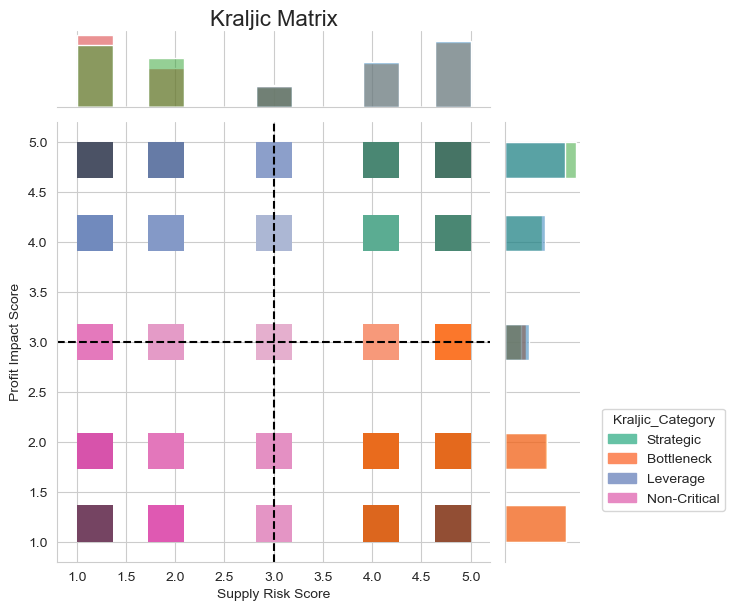

In [10]:
sns.set_style("whitegrid")


ax = sns.jointplot(
                    data = matrix_df
                    ,y='Profit_Impact_Score'
                    ,x='Supply_Risk_Score'
                    ,hue='Kraljic_Category'
                    ,kind="hist"
                    ,palette='Set2'
                    )

sns.move_legend(ax.ax_joint, loc = 'lower center', bbox_to_anchor=(1.4, 0.1))

plt.title('Kraljic Matrix',y=1.2,fontsize = 16)
plt.ylabel('Profit Impact Score')
plt.xlabel('Supply Risk Score')

plt.axhline(3,color='black',linestyle='--')
plt.axvline(3,color='black',linestyle='--')

plt.show()

### Let's see which region is the moste dangerous for supply chain

In [18]:
matrix_df['Supplier_Region'].value_counts()

Supplier_Region
Asia             269
Global           250
Europe           226
North America     96
Africa            83
South America     76
Name: count, dtype: int64

In [24]:
supply_region_df = matrix_df[['Supplier_Region','Supply_Risk_Score']] 
supply_region_df.head()

,Supplier_Region,Supply_Risk_Score
0,South America,5
1,South America,5
2,Asia,4
3,South America,5
4,Asia,4


In [86]:
supply_region_df_gb = supply_region_df.groupby(by=['Supplier_Region','Supply_Risk_Score'])['Supply_Risk_Score'].sum()
supply_region_df_gb.name = 'Supply_Risk_Score_Number'
supply_region_df_gb.head()

Supplier_Region  Supply_Risk_Score
Africa           3                     33
                 4                    120
                 5                    210
Asia             1                     30
                 2                     70
Name: Supply_Risk_Score_Number, dtype: int64

In [88]:
supply_region_df_gb.index

MultiIndex([(       'Africa', 3),
            (       'Africa', 4),
            (       'Africa', 5),
            (         'Asia', 1),
            (         'Asia', 2),
            (         'Asia', 3),
            (         'Asia', 4),
            (         'Asia', 5),
            (       'Europe', 1),
            (       'Europe', 2),
            (       'Europe', 3),
            (       'Europe', 4),
            (       'Europe', 5),
            (       'Global', 1),
            (       'Global', 2),
            (       'Global', 3),
            ('North America', 1),
            ('North America', 2),
            ('North America', 3),
            ('South America', 3),
            ('South America', 4),
            ('South America', 5)],
           names=['Supplier_Region', 'Supply_Risk_Score'])

In [90]:
supply_region_df_gb = supply_region_df_gb.to_frame()
supply_region_df_gb.head()

Supply_Risk_Score_Number
Supplier_Region Supply_Risk_Score                          
Africa          3                                        33
                4                                       120
                5                                       210
Asia            1                                        30
                2                                        70

In [92]:
supply_region_df_gb.index

MultiIndex([(       'Africa', 3),
            (       'Africa', 4),
            (       'Africa', 5),
            (         'Asia', 1),
            (         'Asia', 2),
            (         'Asia', 3),
            (         'Asia', 4),
            (         'Asia', 5),
            (       'Europe', 1),
            (       'Europe', 2),
            (       'Europe', 3),
            (       'Europe', 4),
            (       'Europe', 5),
            (       'Global', 1),
            (       'Global', 2),
            (       'Global', 3),
            ('North America', 1),
            ('North America', 2),
            ('North America', 3),
            ('South America', 3),
            ('South America', 4),
            ('South America', 5)],
           names=['Supplier_Region', 'Supply_Risk_Score'])

In [94]:
supply_region_df_gb.reset_index(inplace=True)
supply_region_df_gb.head()

,Supplier_Region,Supply_Risk_Score,Supply_Risk_Score_Number
0,Africa,3,33
1,Africa,4,120
2,Africa,5,210
3,Asia,1,30
4,Asia,2,70


In [114]:
supply_region_df_gb['Supply_Risk_Score'] = supply_region_df_gb['Supply_Risk_Score'].astype('object')
supply_region_df_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Supplier_Region           22 non-null     object
 1   Supply_Risk_Score         22 non-null     object
 2   Supply_Risk_Score_Number  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [130]:
supply_region_df_gb['Combine_Index'] = supply_region_df_gb['Supplier_Region'].astype(str) + ' - ' + supply_region_df_gb['Supply_Risk_Score'].astype(str)

supply_region_df_gb.set_index('Combine_Index',inplace=True)

supply_region_df_gb.index

Index(['Africa - 3', 'Africa - 4', 'Africa - 5', 'Asia - 1', 'Asia - 2',
       'Asia - 3', 'Asia - 4', 'Asia - 5', 'Europe - 1', 'Europe - 2',
       'Europe - 3', 'Europe - 4', 'Europe - 5', 'Global - 1', 'Global - 2',
       'Global - 3', 'North America - 1', 'North America - 2',
       'North America - 3', 'South America - 3', 'South America - 4',
       'South America - 5'],
      dtype='object', name='Combine_Index')

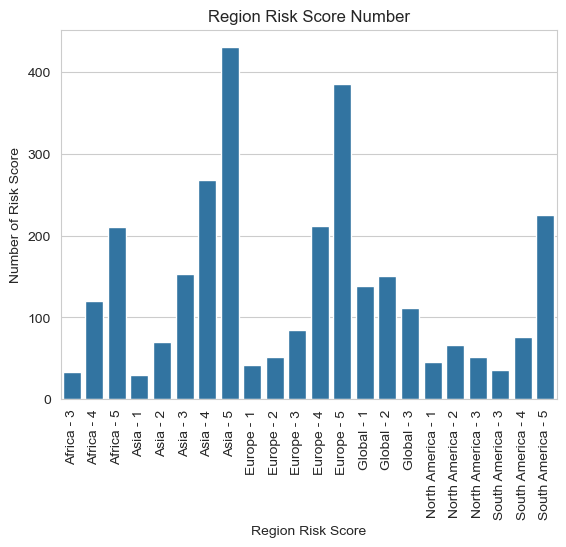

In [140]:
ax = sns.barplot(
                x=supply_region_df_gb.index
                ,y=supply_region_df_gb['Supply_Risk_Score_Number']
                )

plt.title('Region Risk Score Number')
plt.xlabel('Region Risk Score')
plt.ylabel('Number of Risk Score')

plt.xticks(rotation=90)

plt.show()

In [ ]:
supply_region_df_gb.